In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
import accessOntology as aO
import collections
from itertools import groupby
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys
import os

props=['hasSpeed', 'carries', 'hasAge', 'hasBodyShape', 'hasGender', 'hasHight', 'hasPose', 'hasSkinPigmentation',
'leading', 'wearingColor',  'rides', 'usingMobilityAid','wearing']
lists=[[0, 3, 6, 10, 13, 16, 20],
['box', 'mirror', 'suitcase', ],
['adult', 'child', 'elderly', 'teenager'],
['average', 'muscular', 'obese', 'slim'],
['diverse', 'female', 'male'],
['Under80', '150to180', '180andMore', '80to150'],
['crawling', 'laying', 'running', 'sitting', 'standing', 'walking', 'riding'],
['high', 'low', 'middle'],
['Motorcycle','BigAnimal', 'SmallAnimal', 'Bike'],
['checkered', 'striped', 'colourBlack', 'colourBlue', 'colourBrown', 'colourGreen', 'colourGrey', 'colourOrange', 'colourPink', 'colourPurple', 'colourRed', 'colourWhite', 'colourYellow', 'defaultColouring', 'camouflage', 'floralPrint', 'leopardPrint','tigerPrint', 'zebraPrint', 'ambulanceColouring', 'fireFighterColouring', 'policeColouring', 'railwayServiceCouloring'],
['Motorcycle','BigAnimal', 'Bike'],
['cane', 'crutches', 'walker', 'wheelChair'],
['burqa', 'faceMask', 'helmet', 'hijab', 'sunglasses' ]]
def flatten(lis):
    flat_list = [item for sublist in lis for item in sublist]
    return flat_list

def generate_pairs(params, key1, key2, res):
	tuples_a = [(key1, val) for val in params[key1]]
	tuples_b = [(key2, val) for val in params[key2]]
	pairs = itertools.product(tuples_a, tuples_b)
	res.append([{'p1':pair[0][0], 'vp1': pair[0][1], 'p2':pair[1][0], 'vp2': pair[1][1]} for pair in pairs])
    
def generate_all_pairs(params):
    result = []
    for key1, key2 in itertools.permutations(params.keys(), r=2):
        generate_pairs(params, key1, key2, result)
    res=flatten(result)
    return res

def add_line(ax, xpos, ypos, long=False):
    new=ypos+0.2
    linew=0.3
    if long:
        new= ypos+1.3
        linew=0.8
    line = plt.Line2D([ypos, new], [xpos, xpos], color='grey', transform=ax.transAxes, linewidth=linew)
    line.set_clip_on(False)
    ax.add_line(line)

def add_line_vert(ax, xpos, ypos, long=False):
    new=xpos+0.2
    linew=0.3
    if long:
        new= xpos+1.3
        linew=0.8
    line = plt.Line2D([ypos, ypos], [xpos, new], color='grey', transform=ax.transAxes, linewidth=linew)
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df, fonts):
    xpos = -.15 #-.105
    scale = 1./df.index.size
    for level in [1,0]:
        long=False
        if level==0:
            long=True
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            add_line(ax, pos*scale, xpos, long)#(axis, xdata, ydata)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            ax.text(xpos+0.075, lypos-0.005, label, ha='center', transform=ax.transAxes, fontsize=fonts)
        add_line(ax, pos*scale , xpos, long)
        xpos -= .15

def label_group_bar_tableY(ax, df,fonts):
    xpos = -.15
    scale = 1./df.index.size
    for level in [1,0]:
        long=False
        if level==0:
            long=True
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            add_line_vert(ax, xpos, 1-pos*scale, long)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            ax.text(1-(lypos+0.005), xpos+0.075 , label, va='center', transform=ax.transAxes, fontsize=fonts, rotation=90)
        add_line_vert(ax, xpos, 1-pos*scale, long)
        xpos -= .15

def dict_for_legend(df):
    extract= (df[['reason','reasonNum']])
    extract.reset_index(inplace=True)
    value_to_int = (extract[['reason','reasonNum']].drop_duplicates())
    value_to_int.set_index('reasonNum', inplace=True)
    for key, values in value_to_int.to_dict().items():
       dic_= values
    dic_[0]='covered'
    dic_that_I_need=collections.OrderedDict(sorted(dic_.items()))
    for key, value in dic_that_I_need.items():
      dic_that_I_need[key]= value.replace('Person & ', '')
    return dic_that_I_need

In [3]:
res = dict(zip(props, lists))
allPairs= generate_all_pairs(res)
d = pd.DataFrame(allPairs)

#initially all pairs receive a code 0 as reason for rejection (=not rejected)
d['reasonNum']=np.zeros((4708,1))
#for matching
d.set_index(['p1', 'vp1', 'p2', 'vp2'], inplace=True)


#run the generation procedure and receive dictionary of declined pairs with reason 
explDict2=aO.returnDict()
for dic in explDict2:
    for key, value in dic.items():
        try: dic[key]=int(value)
        except:continue
dfE=pd.DataFrame.from_dict(explDict2)
dfE['reasonNum'] = pd.factorize(dfE['reason'])[0] + 1
#for matching
dfE.set_index(['p1', 'vp1', 'p2', 'vp2'], inplace=True)

#update reasons for rejection in the dataframe with all pairs
d.update(dfE)
d.reset_index(inplace=True)


total no of pairs: 2354
no of valid inds: 2069
no of discarded inds: 285.0


C:\Users\mku\AppData\Local\Temp\ipykernel_21948\2508324726.py:23: UserWarning: Using the axes or figure transform requires a bounding box in the respective coordinates. Using bbox_to_anchor=(0, 0, 1, 1) now.
  cax = inset_axes(cbbox,


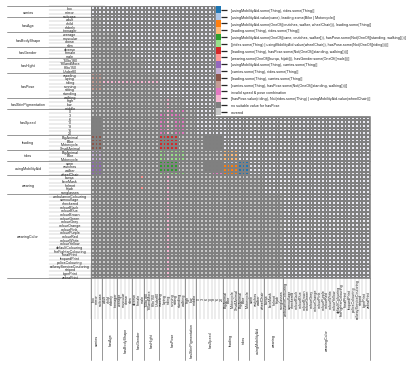

In [52]:
#full pic for appendix
dp=pd.pivot(d, index=['p1','vp1'], columns=['p2','vp2'] )
dp.sort_index(axis=0,ascending=True, inplace=True)
dp.sort_index(axis=1,ascending=True, inplace=True)

mpl.rcParams['font.family'] = 'Arial'

#to show only half of matrix below main diagonal
mask = np.triu(np.ones_like(dp, dtype=bool))

cmap = sns.color_palette("tab20", 16)
cmap.reverse()

fig, ax = plt.subplots()

#white box for legend background
cbbox = ax.inset_axes((0.45,0.6,0.55,0.4))
cbbox.set_facecolor([1,1,1,1])
cbbox.set_yticks([])
cbbox.set_xticks([])

#new axes for legend
cax = inset_axes(cbbox,
                 width="3%",  # width: 40% of parent_bbox width
                 height="100%",  # height: 10% of parent_bbox height
                 loc='upper left',
                 bbox_transform=cbbox.transAxes,
                 borderpad=0,
                 )

g= sns.heatmap(dp, ax=ax, cbar_ax=cax, cbar_kws={'orientation': 'vertical'}, cmap= cmap,vmin=0, vmax=15,mask=mask,  
             linewidths=.3,linecolor='grey' , xticklabels=1,  yticklabels=1)

#print properties and values as axis tick labels
ax.set_yticks([])
ax.set_xticks([])
label_group_bar_table(ax, dp,3.7)
label_group_bar_tableY(ax, dp,3.7)
ax.set_ylabel('')    
ax.set_xlabel('')

#legend
n = 16 #number of reasons for rejection + 'covered'
colorbar = g.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
dic_that_I_need= dict_for_legend(dfE)
colorbar.set_ticklabels(list(dic_that_I_need.values()), fontsize=3.7) 

figFile= os.path.join(sys.path[0], 'pairs.pdf')
plt.savefig(figFile, bbox_inches='tight')


In [53]:
options = ['colourGreen', 'colourRed', 'colourGrey'] 

d2=d.drop(    d[    (-d['vp1'].isin(options) &       (d['p1'] == 'wearingColor')) ].index     )
d3=d2.drop(    d2[    (-d2['vp2'].isin(options) &       (d2['p2'] == 'wearingColor')) ].index     )
#print(d3[d3['vp1']=='colourGreen'])
#df.loc[(df.Event == 'Dance'),'Event']='Hip-Hop'
#print(d3.vp1)
d3.loc[(d3.vp1 =='colourGrey'),'vp1']='colourPlaceholder'
d3.loc[(d3.vp2 =='colourGrey'),'vp2']='colourPlaceholder'

C:\Users\mku\AppData\Local\Temp\ipykernel_21948\3219505715.py:24: UserWarning: Using the axes or figure transform requires a bounding box in the respective coordinates. Using bbox_to_anchor=(0, 0, 1, 1) now.
  cax = inset_axes(cbbox,


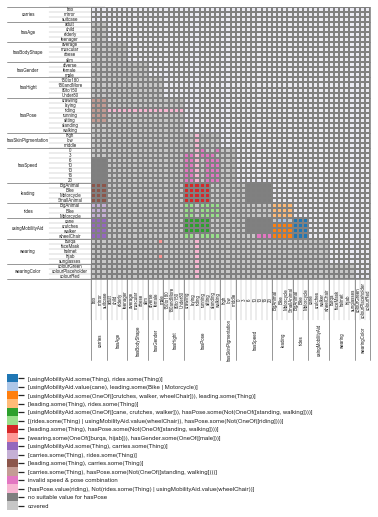

In [54]:
#cropped picture
sns.set(rc={'figure.figsize':(5,5)})
dp=pd.pivot(d3, index=['p1','vp1'], columns=['p2','vp2'] )
dp.sort_index(axis=0,ascending=True, inplace=True)
dp.sort_index(axis=1,ascending=True, inplace=True)

mpl.rcParams['font.family'] = 'Arial'

#to show only half of matrix below main diagonal
mask = np.triu(np.ones_like(dp, dtype=bool))

cmap = sns.color_palette("tab20", 16)
cmap.reverse()

fig, ax = plt.subplots()

#white box for legend background
cbbox = ax.inset_axes((-0.3,-0.85,0.5,0.5))#((0.2,0.75,0.8,0.25))
cbbox.set_facecolor([1,1,1,1])
cbbox.set_yticks([])
cbbox.set_xticks([])

#new axes for legend
cax = inset_axes(cbbox,
                 width="8%",  # width: 40% of parent_bbox width
                 height="100%",  # height: 10% of parent_bbox height
                 loc='upper left',
                 bbox_transform=cbbox.transAxes,
                 borderpad=0,
                 )

g= sns.heatmap(dp, ax=ax, cbar_ax=cax, cbar_kws={'orientation': 'vertical'}, cmap= cmap,vmin=0, vmax=15,mask=mask,  
             linewidths=.3,linecolor='grey' , xticklabels=1,  yticklabels=1)

#print properties and values as axis tick labels
ax.set_yticks([])
ax.set_xticks([])
label_group_bar_table(ax, dp,4.5)
label_group_bar_tableY(ax, dp,4.5)
ax.set_ylabel('')    
ax.set_xlabel('')

#legend
n = 16 #number of reasons for rejection + 'covered'
colorbar = g.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
#colorbar.tick_params(length=1)
dic_that_I_need= dict_for_legend(dfE)
'''for key, value in dic_that_I_need.items():
    #print(value)
    if value=='[usingMobilityAid.some(OneOf([cane, crutches, walker])), hasPose.some(Not(OneOf([standing, walking])))]':
        print('here')
        dic_that_I_need[key]='[usingMobilityAid.some(OneOf([cane, crutches, walker])),\nhasPose.some(Not(OneOf([standing, walking])))]'
    if value=='[(rides.some(Thing) | usingMobilityAid.value(wheelChair)), hasPose.some(Not(OneOf([riding])))]':
    
        dic_that_I_need[key]='[(rides.some(Thing) | usingMobilityAid.value(wheelChair)),\nhasPose.some(Not(OneOf([riding])))]'
'''
colorbar.set_ticklabels(list(dic_that_I_need.values()), fontsize=6) 
figFile= os.path.join(sys.path[0], 'pairs_cropped.pdf')
plt.savefig(figFile, bbox_inches='tight')
